DSCI100 002, Group 18

Group Members: Jimmy Choy, Jennifer Law, Heather Lu, Elise Wong



**Sleep Disorder Diagnosis**

**Introduction:**

Sleep is a fundamental aspect of human life and is critical to physical and mental health. However, many people suffer from sleep disorders, which involve problems with the quality, timing, and amount of sleep. The two most common sleep disorders are sleep apnea, where breathing frequently stops during sleep, and insomnia, where people have difficulty falling and staying asleep. Sleep disorders can be influenced by lifestyle and are often comorbid with chronic health disorders.

In our project, we will utilise the Sleep Health and Lifestyle Dataset. This dataset is a collection of information pertaining to sleep, lifestyle factors, cardiovascular health, and sleep disorders. Using the dataset, we aim to determine: “How can lifestyle and physiological measures be used to determine the absence or presence of diagnosed sleep disorders?” 
 

**Methods:**

**Preliminary exploratory data analysis**

In [12]:
library(tidyverse)
library(tidymodels)
url <- "https://drive.google.com/uc?export=download&id=1oltvINJVaLEg0raTdWG2IoFCf6w4h5vD"
sleep_data <- read_delim(url,
                         delim = ",")
head(sleep_data)

Rows: 374 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): Gender, Occupation, BMI Category, Blood Pressure, Sleep Disorder
dbl (8): Person ID, Age, Sleep Duration, Quality of Sleep, Physical Activity...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia


In [13]:
#adding a period to replace spaces in the headers
colnames(sleep_data) <- make.names(colnames(sleep_data))

In [3]:
#separating bp column
sleep_data <- separate(sleep_data,
    col = Blood.Pressure,
    into = c("Systolic.BP", "Diastolic.BP"),
    sep = "/",
    convert = TRUE) 

In [4]:
#removing unwanted predictors
sleep_data_2 <- sleep_data |>
    select(-Person.ID, -Gender, -Occupation, -BMI.Category)
head(sleep_data_2)

Age,Sleep.Duration,Quality.of.Sleep,Physical.Activity.Level,Stress.Level,Systolic.BP,Diastolic.BP,Heart.Rate,Daily.Steps,Sleep.Disorder
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>
27,6.1,6,42,6,126,83,77,4200,None
28,6.2,6,60,8,125,80,75,10000,None
28,6.2,6,60,8,125,80,75,10000,None
28,5.9,4,30,8,140,90,85,3000,Sleep Apnea
28,5.9,4,30,8,140,90,85,3000,Sleep Apnea
28,5.9,4,30,8,140,90,85,3000,Insomnia


In [5]:
#combining 'sleep apnea' and 'insomnia' into 'sleep disorders'
sleep_apnea_untidy <- sleep_data_2 |>
filter(Sleep.Disorder == "Sleep Apnea") |>
select(-Sleep.Disorder)
sleep_apnea_tidy <- data.frame(sleep_apnea_untidy, Diagnosis = "Sleep Disorder")

insomnia_untidy <- sleep_data_2 |>
filter(Sleep.Disorder == "Insomnia") |>
select(-Sleep.Disorder)
insomnia_tidy <- data.frame(insomnia_untidy, Diagnosis = "Sleep Disorder")

none_untidy <- sleep_data_2 |>
filter(Sleep.Disorder == "None") |>
select(-Sleep.Disorder)
none_tidy <- data.frame(none_untidy, Diagnosis = "None")

tidy_sleep_data <- rbind(sleep_apnea_tidy, insomnia_tidy, none_tidy)

head(tidy_sleep_data)

,Age,Sleep.Duration,Quality.of.Sleep,Physical.Activity.Level,Stress.Level,Systolic.BP,Diastolic.BP,Heart.Rate,Daily.Steps,Diagnosis
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>
1,28,5.9,4,30,8,140,90,85,3000,Sleep Disorder
2,28,5.9,4,30,8,140,90,85,3000,Sleep Disorder
3,29,6.5,5,40,7,132,87,80,4000,Sleep Disorder
4,29,6.0,6,30,8,120,80,70,8000,Sleep Disorder
5,30,6.4,5,35,7,130,86,78,4100,Sleep Disorder
6,31,7.7,7,75,6,120,80,70,8000,Sleep Disorder


In [6]:
#splitting the data into training and test sets
sleep_split <- initial_split(tidy_sleep_data, prop = 0.75, strata = Diagnosis)
sleep_train <- training(sleep_split)
sleep_test <- testing(sleep_split)

**Table 1**

The table below represents the number of observations and percentages for each class in the training set.

In [7]:
summary_table_1 <- sleep_train |>
  group_by(Diagnosis) |>
  summarize(count = n(), percentage = n()/nrow(sleep_train)*100)

summary_table_1

Diagnosis,count,percentage
<chr>,<int>,<dbl>
None,164,58.57143
Sleep Disorder,116,41.42857


**Table 2**

The table below represents the means for each predictor in the training set.

In [8]:
summary_table_2 <- summarize(sleep_train, across(Age:Daily.Steps, mean))
summary_table_2

Age,Sleep.Duration,Quality.of.Sleep,Physical.Activity.Level,Stress.Level,Systolic.BP,Diastolic.BP,Heart.Rate,Daily.Steps
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
42.10714,7.126071,7.335714,60.05714,5.385714,128.4179,84.54286,70.18929,6881.429


**Visualization**

Mean stress level (1-10)--where 1 represents lowest stress and 10 represents highest--between those with a sleep disorder diagnosis versus those without, in the training set. We observe that the mean stress level is greater for individuals with a sleep disorder diagnosis compared to those without.

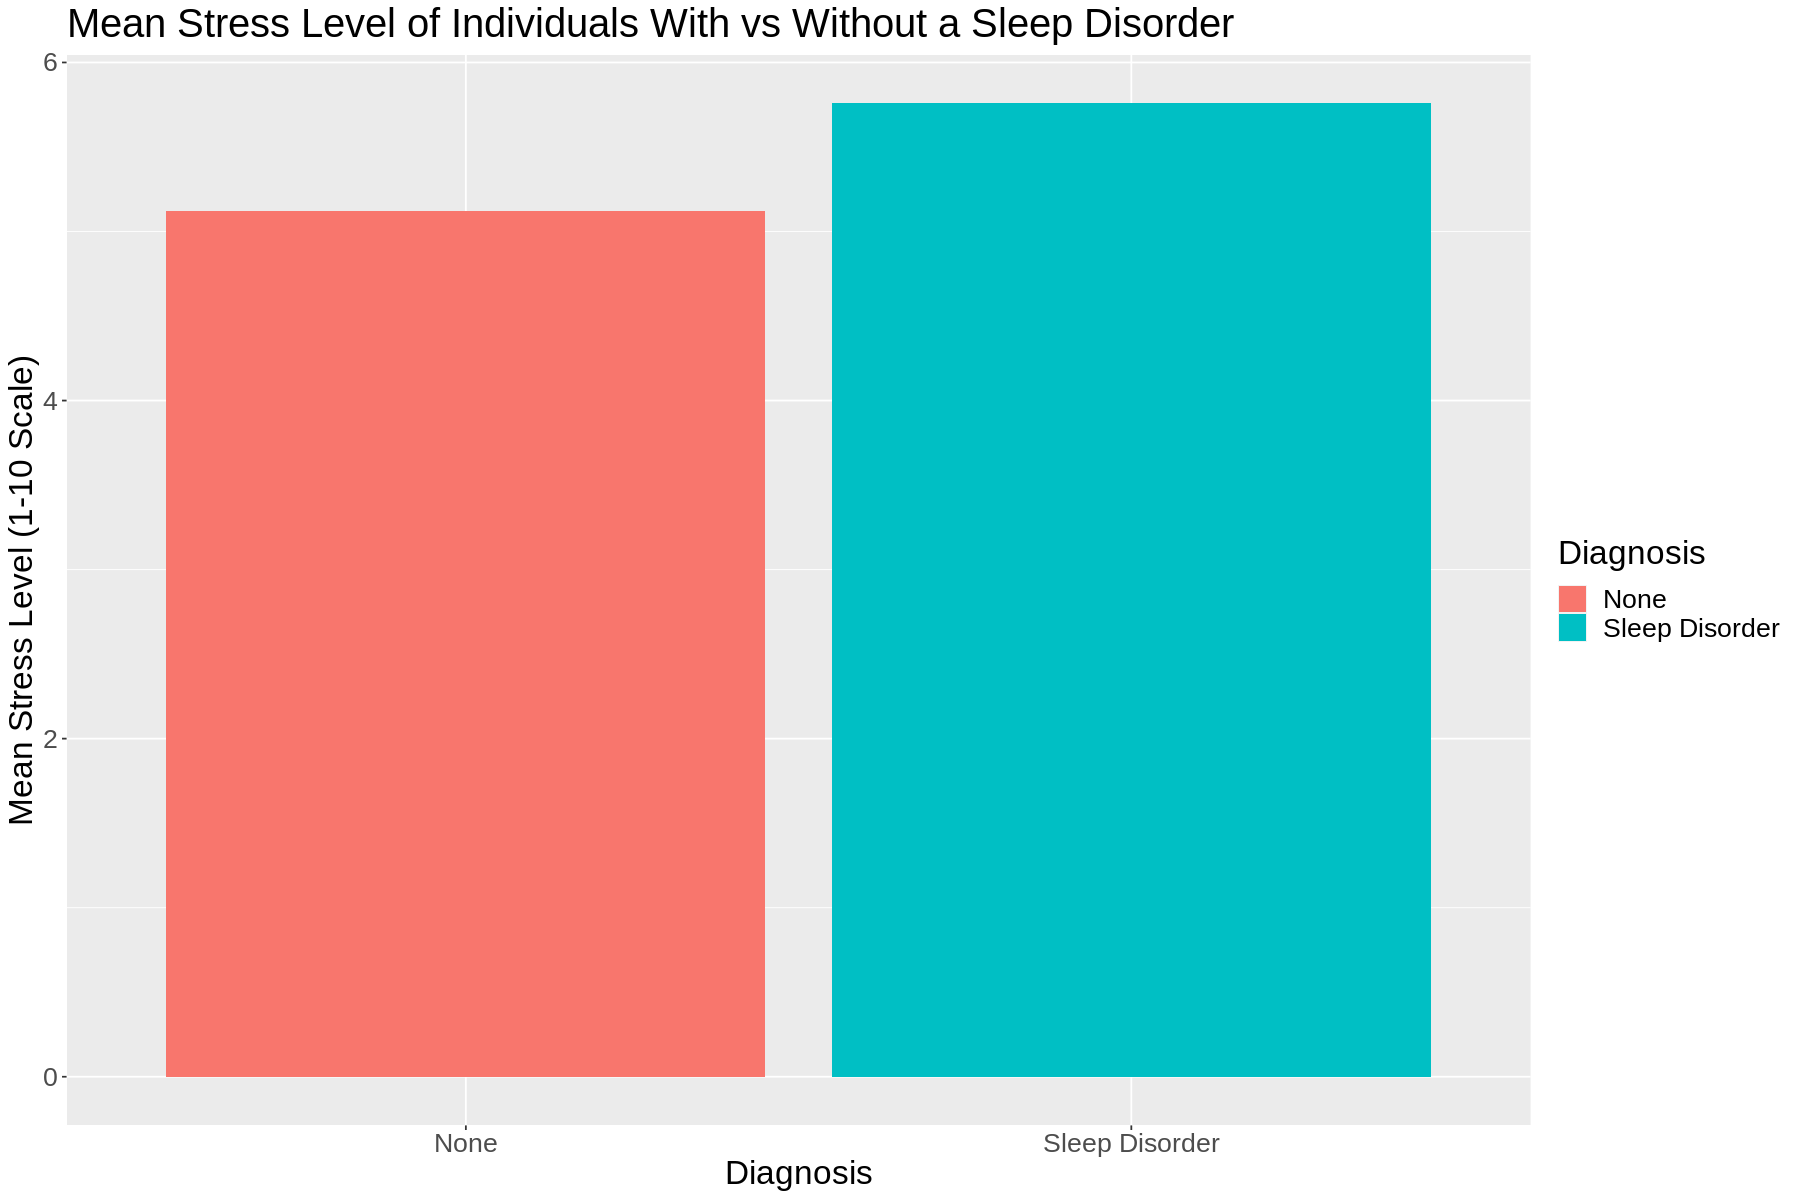

In [10]:
stress_mean <- sleep_train |>
    group_by(Diagnosis) |>
    summarize(Stress = mean(Stress.Level))

options(repr.plot.width = 15, repr.plot.height = 10)

mean_stress_plot <- stress_mean |>
        ggplot(aes(y = Stress, x = Diagnosis, fill = Diagnosis))+
        geom_bar(stat = "identity", position = "dodge")+
        labs(x = "Diagnosis", y = "Mean Stress Level (1-10 Scale)") +
        theme(text = element_text(size = 20)) +
        ggtitle("Mean Stress Level of Individuals With vs Without a Sleep Disorder")
mean_stress_plot  

**Expected outcomes and significance:**

From our project, we expect to create a classification model that is able to predict an unclassified observation’s presence of a sleep disorder based on given physiological measures and lifestyle factors, as well as find the best K parameter that would provide the most accurate classifying model. These findings may help determine common factors associated with sleep disorder patients and which factors are strongly or weakly linked.

We expect individuals who report the shortest sleep duration, the lowest levels of physical activity, the highest stress levels, and clinically unhealthier physiological measurements to have the highest occurrences of sleep disorder diagnosis.

**Future questions our project could lead to are:**
- What forms of interventions could be implemented to help the populations most affected by sleep disorders?
- Is there one factor that best predicts the presence of sleep disorders?
- Are there any other factors relating to lifestyle habits that also correlate with sleep disorder diagnosis?


**References**
Tharmalingam, L. (2023, May 26). Sleep health and lifestyle dataset. Kaggle.    https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset 